In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import adam
import os

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 35s 3us/step


In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
# normalise the data
X_train=(X_train.astype('float32')-127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [5]:
X_train=X_train.reshape(-1,28*28)
print(X_train.shape)

(60000, 784)


In [6]:
epochs=60
batch_size=256
no_of_batch=int(X_train.shape[0]/batch_size)
half_batch_size=128
noise_dim=100
adam=adam(lr=2e-4,beta_1=0.5)

In [7]:
#generator
generator=Sequential()
generator.add(Dense(256,input_shape=(noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

W0724 20:25:28.944934 12188 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 20:25:28.945932 12188 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 20:25:28.949920 12188 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
# compile
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

W0724 20:25:40.118726 12188 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 20:25:40.127701 12188 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0724 20:25:40.132690 12188 deprecation.py:323] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [9]:
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

In [10]:
# compile
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [11]:
# combined model(discriminator+generator) --> functional API
discriminator.trainable=False
gan_input=Input(shape=(noise_dim,))
generator_output=generator(gan_input)
gan_output=discriminator(generator_output)

model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [13]:
def show_imgs(epoch):
    noise=np.random.normal(0,1,size=(100,noise_dim))
    generated_imgs=generator.predict(noise)
    generated_imgs=generated_imgs.reshape(-1,28,28)
  
  # display the images
    plt.figure(figsize=(10,10))
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],cmap='gray',interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.savefig('images/gan_output_{0}.png'.format(epoch+1))

In [15]:
path='model'
os.mkdir(path)

In [16]:
path2='images'
os.mkdir(path2)

Epoch 151 D loss 240.0539 G loss


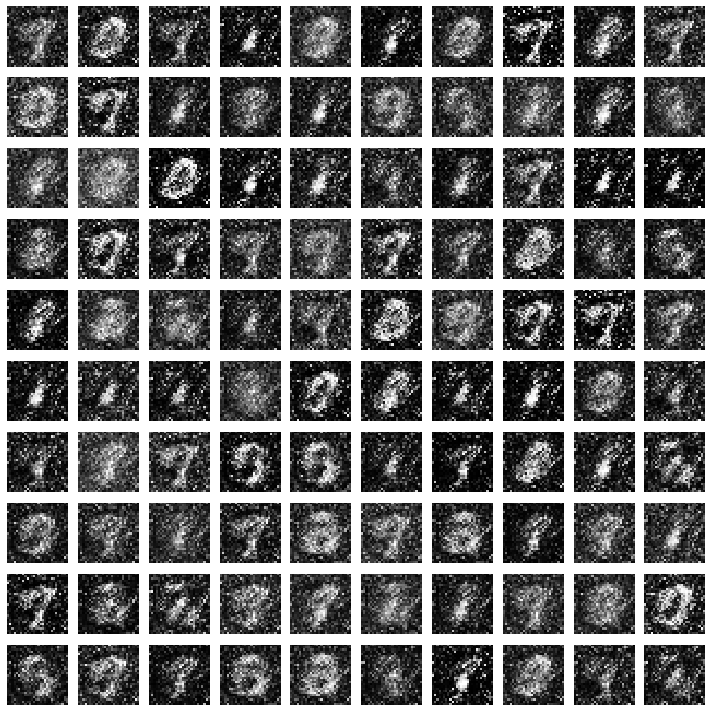

Epoch 148 D loss 260.8321 G loss
Epoch 148 D loss 256.2136 G loss
Epoch 141 D loss 284.5974 G loss
Epoch 135 D loss 304.3466 G loss
Epoch 128 D loss 321.7536 G loss


<Figure size 432x288 with 0 Axes>

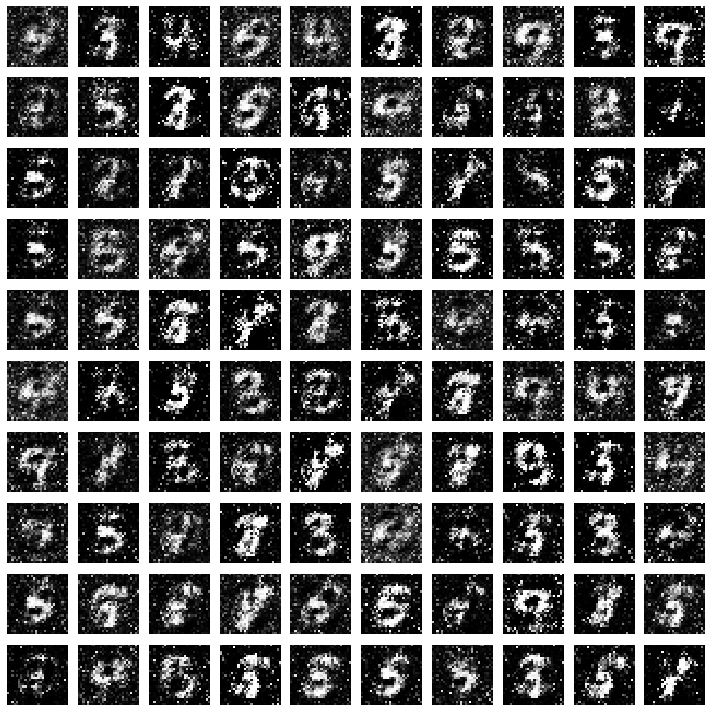

Epoch 128 D loss 327.4897 G loss
Epoch 131 D loss 308.3856 G loss
Epoch 133 D loss 302.1032 G loss
Epoch 140 D loss 281.6678 G loss
Epoch 144 D loss 261.1859 G loss


<Figure size 432x288 with 0 Axes>

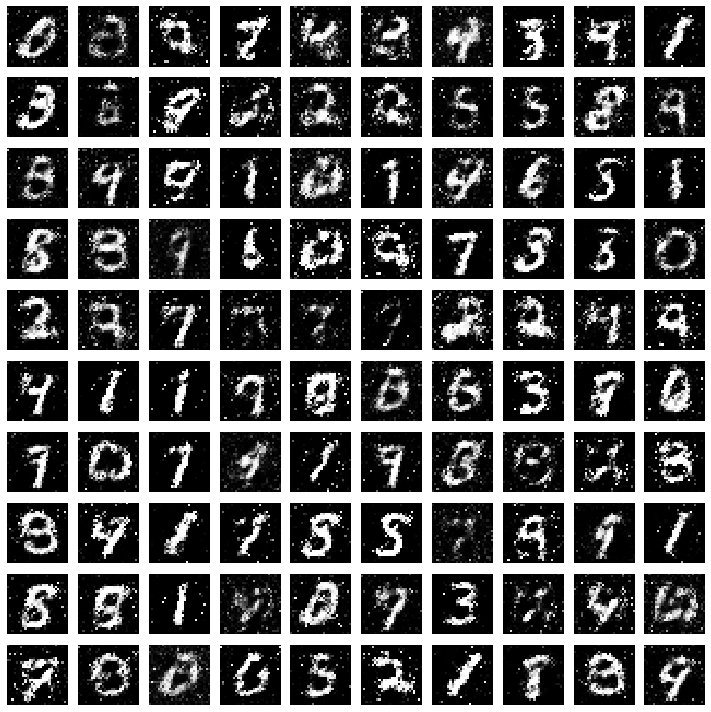

Epoch 147 D loss 254.5853 G loss
Epoch 148 D loss 251.4134 G loss
Epoch 148 D loss 247.7912 G loss
Epoch 147 D loss 247.9586 G loss
Epoch 149 D loss 245.1670 G loss


<Figure size 432x288 with 0 Axes>

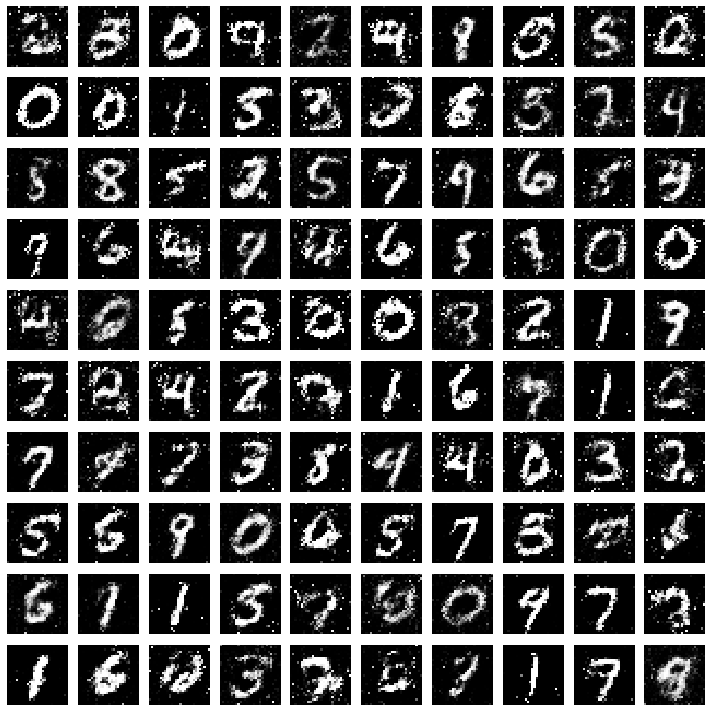

Epoch 149 D loss 246.5980 G loss
Epoch 150 D loss 246.0822 G loss
Epoch 151 D loss 242.6843 G loss
Epoch 151 D loss 240.8236 G loss
Epoch 152 D loss 240.5022 G loss


<Figure size 432x288 with 0 Axes>

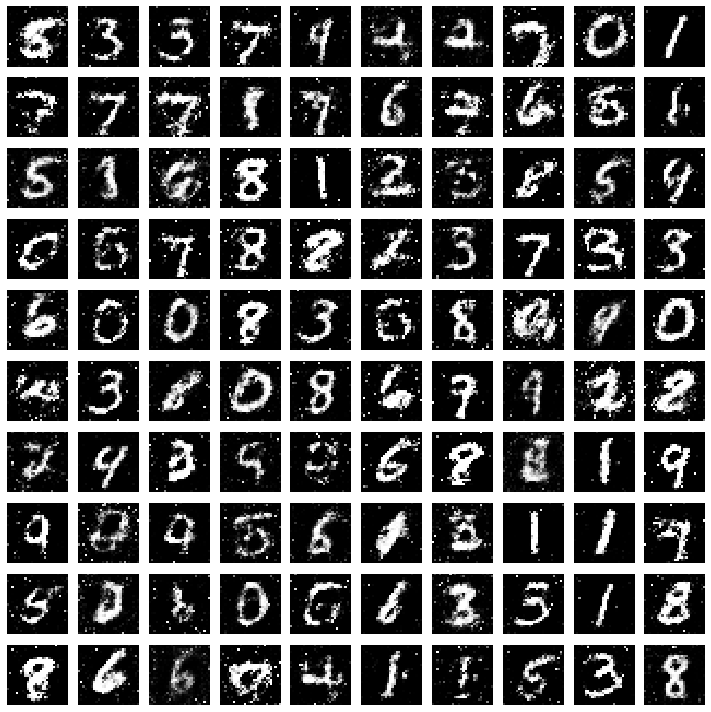

Epoch 152 D loss 237.7293 G loss
Epoch 152 D loss 237.4258 G loss
Epoch 153 D loss 236.4366 G loss
Epoch 153 D loss 236.1027 G loss
Epoch 153 D loss 234.9113 G loss


<Figure size 432x288 with 0 Axes>

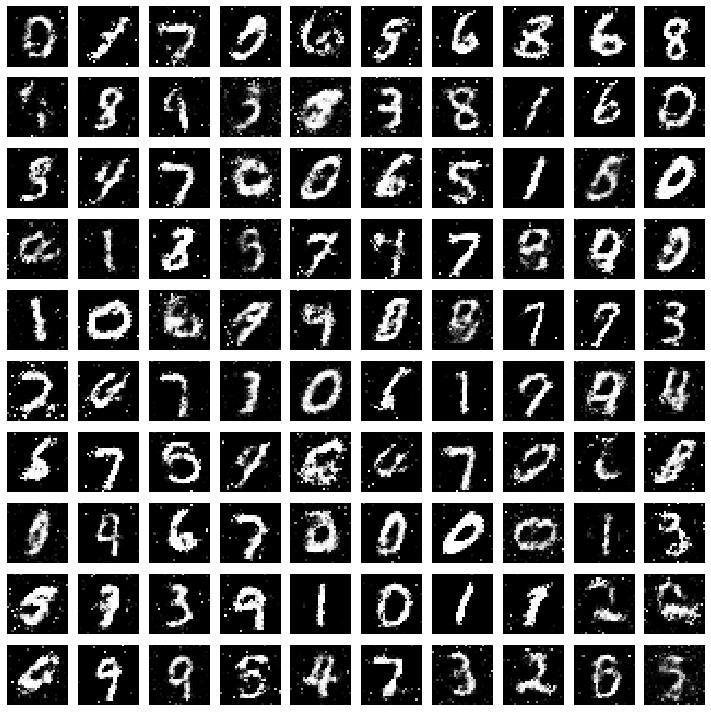

Epoch 154 D loss 236.1622 G loss
Epoch 154 D loss 235.7697 G loss
Epoch 154 D loss 233.2882 G loss
Epoch 153 D loss 236.4384 G loss
Epoch 153 D loss 236.7413 G loss


<Figure size 432x288 with 0 Axes>

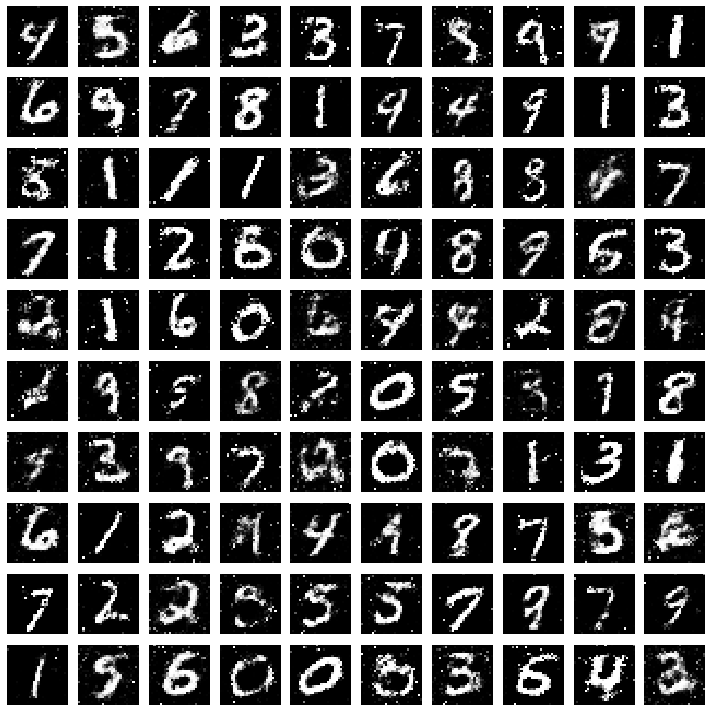

Epoch 154 D loss 235.3210 G loss
Epoch 154 D loss 234.9586 G loss
Epoch 154 D loss 235.0946 G loss
Epoch 154 D loss 233.7932 G loss
Epoch 155 D loss 234.0271 G loss


<Figure size 432x288 with 0 Axes>

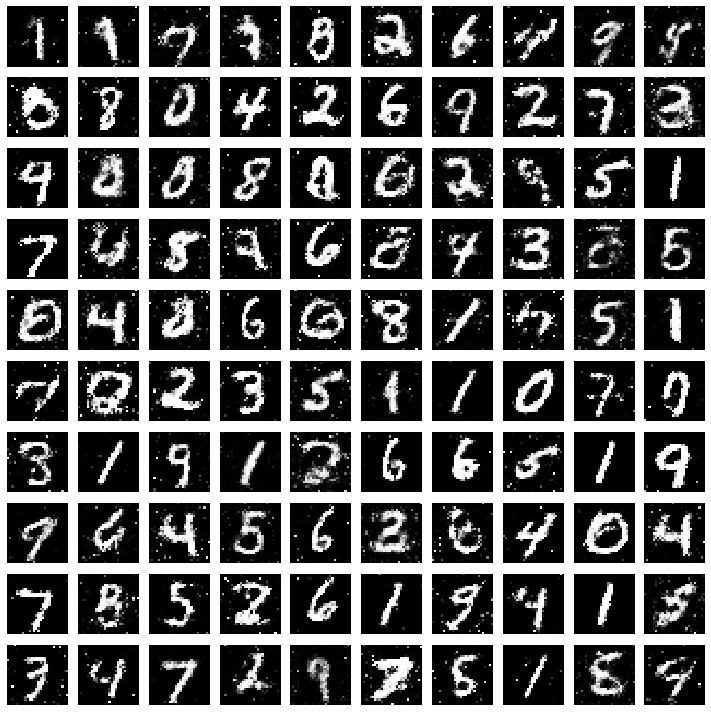

Epoch 154 D loss 234.7918 G loss
Epoch 155 D loss 232.4265 G loss
Epoch 154 D loss 233.1797 G loss
Epoch 154 D loss 233.5208 G loss
Epoch 155 D loss 233.0120 G loss


<Figure size 432x288 with 0 Axes>

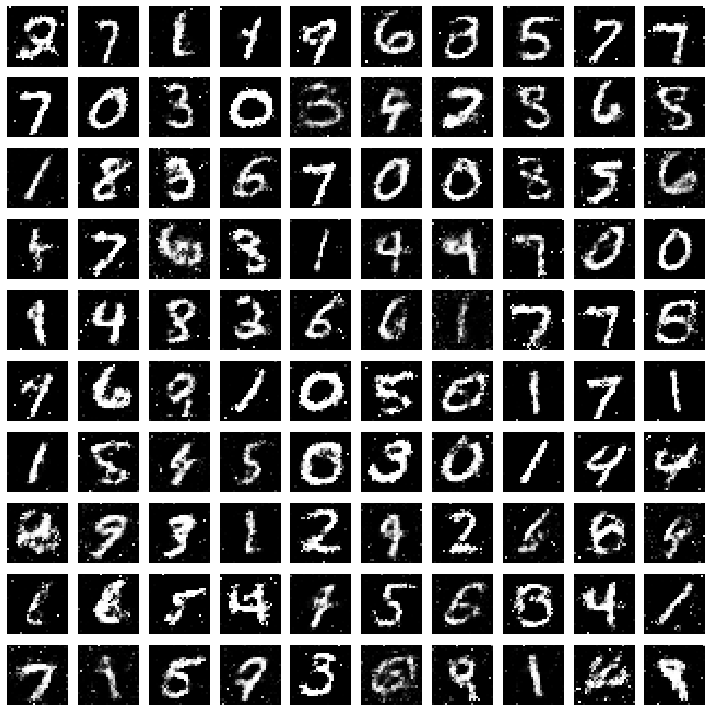

Epoch 154 D loss 231.7536 G loss
Epoch 155 D loss 232.7063 G loss
Epoch 155 D loss 232.1874 G loss
Epoch 155 D loss 233.2407 G loss
Epoch 155 D loss 232.4153 G loss


<Figure size 432x288 with 0 Axes>

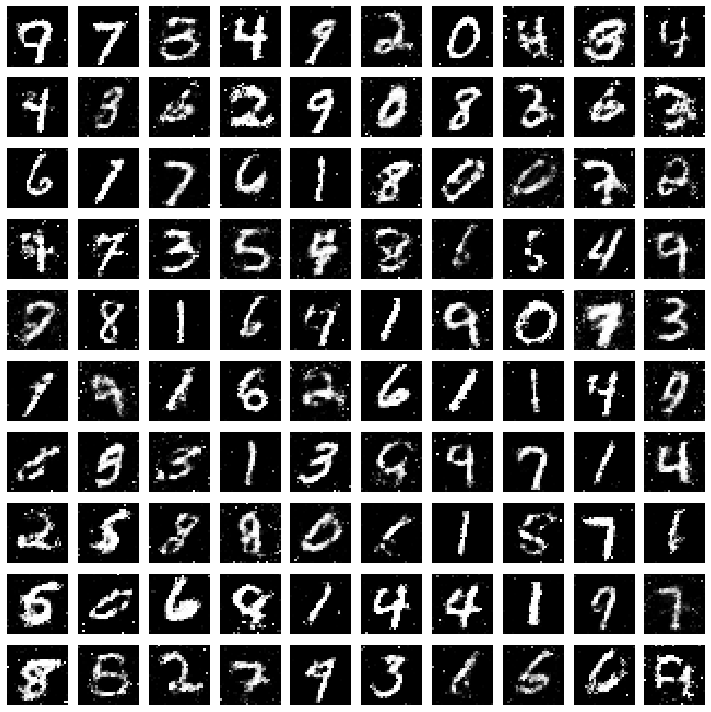

Epoch 155 D loss 232.3869 G loss
Epoch 155 D loss 230.8095 G loss
Epoch 155 D loss 231.5271 G loss
Epoch 155 D loss 231.0608 G loss
Epoch 155 D loss 231.9623 G loss


<Figure size 432x288 with 0 Axes>

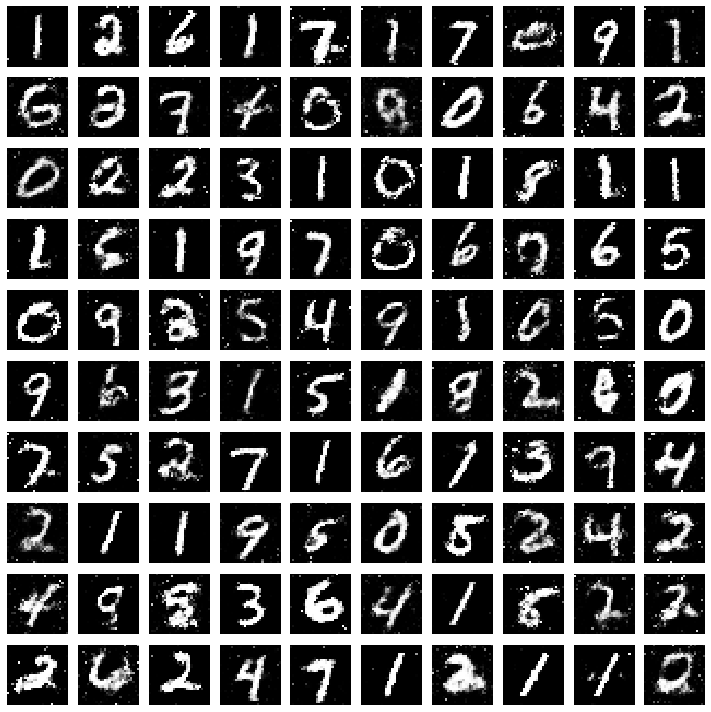

Epoch 155 D loss 231.7765 G loss
Epoch 155 D loss 232.9234 G loss
Epoch 155 D loss 231.4928 G loss
Epoch 156 D loss 230.3001 G loss
Epoch 156 D loss 231.0546 G loss


<Figure size 432x288 with 0 Axes>

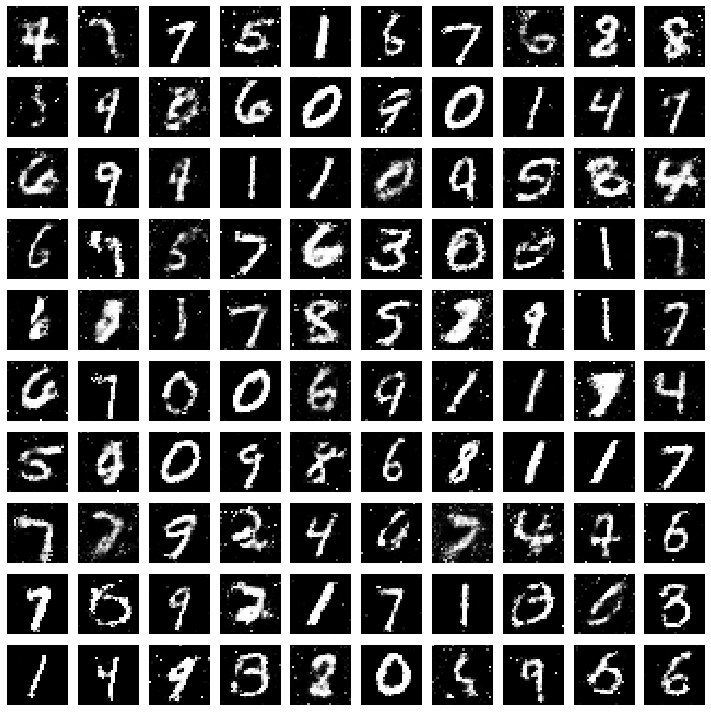

Epoch 156 D loss 231.0570 G loss
Epoch 156 D loss 231.0273 G loss
Epoch 155 D loss 230.7552 G loss
Epoch 155 D loss 231.9740 G loss


<Figure size 432x288 with 0 Axes>

In [17]:
d_losses=[]
g_losses=[]
# training loop
for epoch in range(epochs):
    epoch_d_loss=0
    epoch_g_loss=0
  
  # mini batch
    for step in range(no_of_batch):
        idx=np.random.randint(0,X_train.shape[0],half_batch_size)
        real_imgs=X_train[idx]
    
        # generate fake images assumning generator is frozen
        noise=np.random.normal(0,1,size=(half_batch_size,noise_dim))
        fake_imgs=generator.predict(noise)
    
        # labels
        real_y=np.ones((half_batch_size,1))*0.9
        fake_y=np.zeros((half_batch_size,1))
    
        #train on real and fake images
        d_real_loss=discriminator.train_on_batch(real_imgs,real_y)
        d_fake_loss=discriminator.train_on_batch(fake_imgs,fake_y)
    
        d_loss=0.5*d_real_loss+0.5*d_fake_loss
        epoch_d_loss+=d_loss
    
        # train generator
        noise=np.random.normal(0,1,size=(batch_size,noise_dim))
        real_y=np.ones((batch_size,1))
        g_loss=model.train_on_batch(noise,real_y)
        epoch_g_loss+=g_loss
   
    d_losses.append(epoch_d_loss)
    g_losses.append(epoch_g_loss)
    
    print('Epoch %d D loss %.4f G loss'%(epoch_d_loss,epoch_g_loss))
  
    if (epoch%5)==0:
        generator.save('model/gen_{0}.h5'.format(epoch))
        show_imgs(epoch)